<a href="https://colab.research.google.com/github/Nastaseeakh/Time_series_forecasting/blob/main/Timeseriesforecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Предсказание временных рядов на примере данных датасета elnino statsmodels

## Введение. Постановка целей и задач.

Эль-Ниньо — это природный феномен, для которого характерно аномальное повышение температуры поверхностного слоя воды в центральной и восточной зонах экваториальной части Тихого океана.

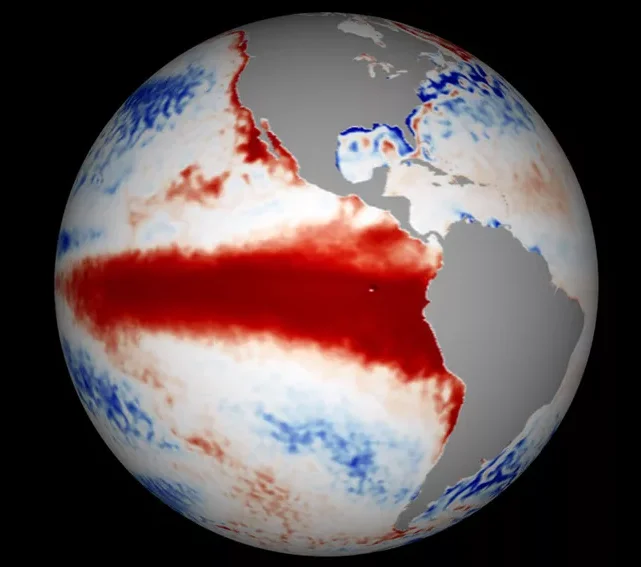

Во время эпизодов Эль-Ниньо нарушается привычный характер атмосферных процессов в тропической зоне, что может вызывать экстремальные климатические явления во всем мире.  
Его влияние выражается, например:  
в продолжительных ливневых дождях, селях и оползнях в Чили и Перу,   
исчезновениии планктона и соответственно рыбы, что сильно бьет по экономике государств,  
в сильнейший засухах и пожарах на западе - в Австралии, Индонезии (неоднократно в годы Эль-Ниньо здесь выгорали целые кофейные плантации.  
Естественным образом стихийные бедствия влекут за собой экономические потери, а те, в свою очередь, иногда могут перерастать в политические кризисы.  
Поэтому прогнозириование возникновения и масштаба Эль-Ниньо имеет критическое значение не только для государств центральной части тихоокеанского региона, а также и для остальной части мира, как части глобальной системы.  

Учитывая вышеизложенное, **целью** данной работы является **построение прогноза температуры поверхностного слоя воды в определенной зоне Тихого океана на основе фактических месячных данных за несколько лет**.  
Для достижения этой цели поставлены следущие **задачи**:  

*   подготовка фактических данных к анализу
*   разведывательный анализ фактических данных
*   обучение моделей и построение прогноза на тренировочной выборке
*   оценка качества полученных моделей и выбор предпочтительной
*   Построение прогноза на всем наборе данных

### Импорт Датафрейма, библиотек

In [ ]:
## импорт библиотек и функций
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
%matplotlib inline 

In [ ]:
## импорт данных
import statsmodels.api as sm
df = sm.datasets.elnino.load_pandas().data
df.tail(10)

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
51,2001.0,24.24,26.11,26.89,25.99,23.98,22.71,21.48,20.24,19.73,20.14,20.68,21.73
52,2002.0,24.09,26.23,27.39,26.44,25.29,23.28,21.64,21.32,21.42,21.85,22.85,24.05
53,2003.0,25.01,26.27,26.91,25.41,23.24,22.15,21.50,21.25,20.75,21.70,22.33,23.60
54,2004.0,25.09,26.47,26.12,25.27,23.44,22.54,21.26,20.79,20.83,21.56,22.88,23.39
55,2005.0,24.61,25.09,25.23,25.21,24.31,22.60,21.61,20.47,20.00,19.89,20.61,22.20
56,2006.0,24.76,26.52,26.22,24.29,23.84,22.82,22.20,21.89,21.93,22.46,22.61,24.15
57,2007.0,25.82,26.81,26.41,24.96,23.05,21.61,21.05,19.95,19.85,19.31,19.82,21.15
58,2008.0,24.24,26.39,26.91,25.68,24.43,23.19,23.02,22.14,21.60,21.39,21.54,22.73
59,2009.0,24.39,25.53,25.48,25.84,24.95,24.09,23.09,22.03,21.48,21.64,21.99,23.21
60,2010.0,24.70,26.16,26.54,26.04,24.75,23.26,21.11,19.49,19.28,19.73,20.44,22.07


### Знакомство с данными.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    61 non-null     float64
 1   JAN     61 non-null     float64
 2   FEB     61 non-null     float64
 3   MAR     61 non-null     float64
 4   APR     61 non-null     float64
 5   MAY     61 non-null     float64
 6   JUN     61 non-null     float64
 7   JUL     61 non-null     float64
 8   AUG     61 non-null     float64
 9   SEP     61 non-null     float64
 10  OCT     61 non-null     float64
 11  NOV     61 non-null     float64
 12  DEC     61 non-null     float64
dtypes: float64(13)
memory usage: 6.3 KB


Имеем набор данных температуры поверхностного слоя воды без пропусков за каждый месяц 61 года, тип данных - float.

## Предобработка данных

Задача этого блока - трансформировать набор данных в датасет из двух колонок - дата и температура - для удобства анализа и построения моделей.

In [ ]:
# трансформируем таблицу, чтобы перевести ее в длинный формат
df = df.set_index("YEAR") \
       .stack(dropna=False) \
       .reset_index()
df.head()

,YEAR,level_1,0
0,1950.0,JAN,23.11
1,1950.0,FEB,24.20
2,1950.0,MAR,25.37
3,1950.0,APR,23.86
4,1950.0,MAY,23.03


In [ ]:
# переименовываем колонки
df = df.rename(columns={'YEAR': 'year',
                        'level_1': 'month',
                        0: 'temp'})
df.head()

,year,month,temp
0,1950.0,JAN,23.11
1,1950.0,FEB,24.20
2,1950.0,MAR,25.37
3,1950.0,APR,23.86
4,1950.0,MAY,23.03


Трансформируем даты в вид "YYYY-MM-01".  
Для этого переведем буквенные обозначения месяцев в числовые и соединим с годом

In [ ]:
df.month.unique()

array(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC'], dtype=object)

In [ ]:
# словарь перевода буквенных обозначений месяцев в числовые
mon = df.month.unique()
mon_ind = list(range(1, 13))
mon = dict(zip(mon, mon_ind))
mon

{'JAN': 1,
 'FEB': 2,
 'MAR': 3,
 'APR': 4,
 'MAY': 5,
 'JUN': 6,
 'JUL': 7,
 'AUG': 8,
 'SEP': 9,
 'OCT': 10,
 'NOV': 11,
 'DEC': 12}

In [ ]:
df['date'] = pd.to_datetime(df.year.apply(lambda x: str(int(x))) + '-' + df.month.apply(lambda x: str(mon[x])))
df.head(13)


,year,month,temp,date
0,1950.0,JAN,23.11,1950-01-01
1,1950.0,FEB,24.20,1950-02-01
2,1950.0,MAR,25.37,1950-03-01
3,1950.0,APR,23.86,1950-04-01
4,1950.0,MAY,23.03,1950-05-01
5,1950.0,JUN,21.57,1950-06-01
6,1950.0,JUL,20.63,1950-07-01
7,1950.0,AUG,20.15,1950-08-01
8,1950.0,SEP,19.67,1950-09-01
9,1950.0,OCT,20.03,1950-10-01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    732 non-null    float64       
 1   month   732 non-null    object        
 2   temp    732 non-null    float64       
 3   date    732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 23.0+ KB


### Вывод по этапу.


Имеем 732 показателя температуры поверхностного слоя воды в определенной части Тихого океана помесячно без пропусков.
Колонки со значениями температур и дат имеют соответствующие типы данных.

## EDA или разведочный анализ данных.

In [ ]:
# посмотрим на распределение температур и характеристики дат
df.describe(include='all')

<ipython-input-10-e7a6430b26a6>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,year,month,temp,date
count,732.000000,732,732.000000,732
unique,NaN,12,NaN,732
top,NaN,JAN,NaN,1950-01-01 00:00:00
freq,NaN,61,NaN,1
first,NaN,NaN,NaN,1950-01-01 00:00:00
last,NaN,NaN,NaN,2010-12-01 00:00:00
mean,1980.000000,NaN,23.092623,NaN
std,17.618856,NaN,2.245903,NaN
min,1950.000000,NaN,18.950000,NaN
25%,1965.000000,NaN,21.250000,NaN


Распределение температурных показателей отличаются небольшими значениями мер рассеивания: разница между наименьшим и наибольшим значением составляет 10,29 градуса, среднеквадратическое отклонение - 2,25 градуса при среднем 23,09 градуса.
Временной ряд охватывает даты с января 1950 по декабрь 2010 без пропусков (каждый месяц повторяется по 61 разу), даты не повторяются.

In [ ]:
# колонку date - в индексы, колонки года и месяца
data = df.set_index('date')
data.head()

,year,month,temp
date,,,
1950-01-01,1950.0,JAN,23.11
1950-02-01,1950.0,FEB,24.20
1950-03-01,1950.0,MAR,25.37
1950-04-01,1950.0,APR,23.86
1950-05-01,1950.0,MAY,23.03


In [ ]:
# посмотрим на распределение температур
figh = px.histogram(data, x="temp",
                   width=700, height=400,
                   labels=dict(temp='Температура, градусы Цельсия'),
                   title='Гистограмма распределения температур',
                   nbins=30)
# линия среднего
figh.add_vline(x=data.temp.mean(),
              line_dash="dash", line_color="green")
figh.show()

figb = px.box(data, x="temp",
              width=700, height=400,
              labels=dict(temp='Температура, градусы Цельсия'),
              title='Распределение температур',
              y='month')
figb.show()

Распределение температур мультимодально: наблюдаем две моды по обе стороны от среднего значения, что является следствием естественных колебаний в течение года. Набор "ящиков с усами" по месяцам демонстрирует выраженную внутригодовую сезонность, а выбросы характеризуют наиболее сильные проявления Эль-Ниньо (в частности, повышение температур с декабря по март).

In [ ]:
# визуализация всего временного ряда
fig = px.line(data, y="temp",
              labels=dict(temp='Температура, градусы Цельсия', date='Год'),
              title='Температура поверхностного слоя воды')

# линия средней температуры
fig.add_hline(y=data.temp.mean(),
              line_dash="dash", line_color="green")
fig.show()

Наблюдаем выраженную годовую сезонность: максимум температур фиксируется в феврале-марте, минимум - в сентябре-октябре.
На графике наблюдаются два значительных повышения температур продолжительностью один-два года: в 1982-1983 и в 1997-1998 годах. Именно в эти периоды зафиксированы самые сильные проявления эль-ниньо. В 20 веке настолько сильное явление было отмечено только в 1925-1926 годах. 
Можно отметить значительные повышения температуры в 1987, 1992, 1993 годах, но влияние эль-ниньо в эти периоды было не настолько ярко выраженным.
Эта аномалия, как правило, продолжается от 8-9 месяцев до года и более. Известны случаи, когда Эль-Ниньо в тропиках Тихого океана продолжалось на протяжении почти двух лет.
Средний период повторяемости — четыре года, хотя интервалы колеблются от 2 до 7 лет. Бывало, что и на протяжении десяти лет не наблюдалось ни одного явления Эль-Ниньо.

In [ ]:
# посмотрим на показатели температур в отношении к среднемесячному значению
monthly_avg_temp = data.groupby('month', as_index=False) \
                     .agg({'temp': 'mean'}) \
                     .rename(columns={'temp': 'means'})
df_mod = pd.merge(data, monthly_avg_temp, on='month')

# маркер превышения среднемесячного значения
df_mod['diff'] = df_mod.temp > df_mod.means
df_mod.head()

,year,month,temp,means,diff
0,1950.0,JAN,23.11,24.392131,False
1,1951.0,JAN,24.19,24.392131,False
2,1952.0,JAN,24.52,24.392131,True
3,1953.0,JAN,24.15,24.392131,False
4,1954.0,JAN,23.02,24.392131,False


In [ ]:
fig = px.scatter(df_mod, 
                 y="temp", x='year',
                 color='diff',
                 labels=dict(temp='Температура, градусы Цельсия', year='Год', diff='Превышение над среднемес.'),
                 title='Температура поверхностного слоя воды в сравнении со среднемесячными показателями')
fig.show()

На графике можно проследить наиболее продолжительные периоды повышения температур, которые и вызывают Эль-Ниньо. Можно увидеть, что годы с температурами выше среднемесячных наблюдаются с периодичностью от 2 до 8 лет, с 80-х годов общая интенсивность явления повышается.

### Вывод по блоку 

Проведенный анализ позволил оценить вариативность признака и выявить ярко выраженную внутригодовую сезонность температурных колебаний, а также неявную сезонность периодичностью 2-8 лет (наиболее частые периоды - 3-4 года).

## Построение моделей, анализ результатов.

In [ ]:
# оставим в датасете только столбец с данными по температурам
data = data.drop(columns=['month', 'year'])
data.head()

,temp
date,
1950-01-01,23.11
1950-02-01,24.20
1950-03-01,25.37
1950-04-01,23.86
1950-05-01,23.03


### Проверка на статичность, разбивка на сезонность и тренд, разделение датасета на тренировочную и тестовую выборки

In [ ]:
!pip install pmdarima -q

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")

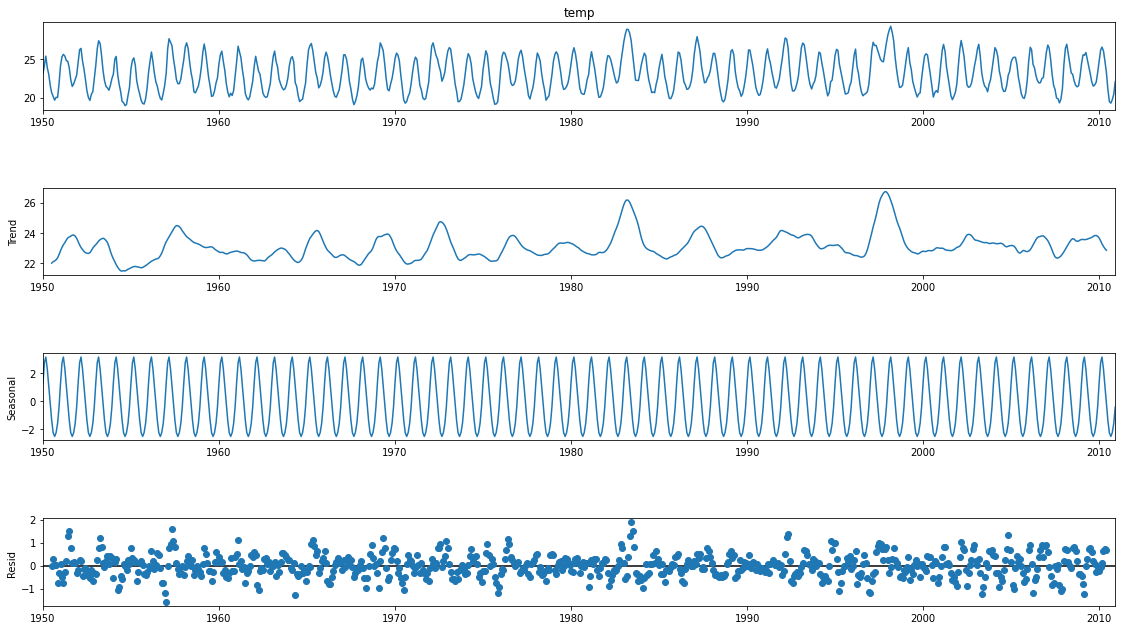

In [ ]:
result = seasonal_decompose(data.temp, model='add').plot()
result.set_figwidth(18)
result.set_figheight(10)

Как видно, временной ряд нестационарен.  
Подтверждается ярко выраженная внутригодовая сезонность, тренд показывает случаи Эль-Ниньо различной интенсивности с периодичностью в несколько лет, в эти же периоды наблюдаем рост величины остатков.
Для того, чтобы проверить наличие иной сезонности, кроме внутригодовой, построим график автокорреляции для лагов до нескольких лет.

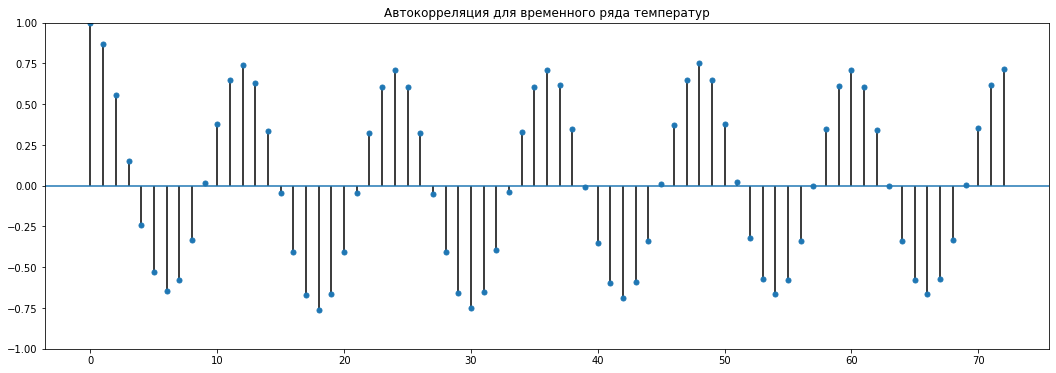

In [ ]:
fig = plot_acf(data, alpha = None,
               lags=72,
               title='Автокорреляция для временного ряда температур')
fig.set_size_inches(18, 6)
plt.show()

Наибольшее значение коэффициента для лагов 0 и 1, что естественно, т.температура изменяется относительно плавно. В остальном наблюдается устойчивая внутригодовая сезонность   (прямая корреляция для 12 и кратных лагов и обратная - для 6, 18 и кратных им лагов)

Разделение данных на test и train. Выборка для тестирования должна содержать не менее полного периода сезонности (12 месяцев) - возьмем 30.

In [ ]:
preds = 30
train = data[:-preds]
test = data[-preds:]
train.head()

,temp
date,
1950-01-01,23.11
1950-02-01,24.20
1950-03-01,25.37
1950-04-01,23.86
1950-05-01,23.03


### Прогнозирование с применением SARIMA

Метод сезонного авторегрессионного интегрированного скользящего среднего (SARIMA) для прогнозирования временных рядов с одномерными данными, содержащими тренды и сезонность.

In [ ]:
# подбор оптимальных параметров модели с учетом сезонности
%%time
auto_arima(data, seasonal=True, m=12).summary()

CPU times: user 2min 39s, sys: 2min 4s, total: 4min 44s
Wall time: 3min 29s


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  732
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood                -585.820
Date:                             Thu, 09 Feb 2023   AIC                           1183.639
Time:                                     10:35:57   BIC                           1211.214
Sample:                                 01-01-1950   HQIC                          1194.277
                                      - 12-01-2010                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0753      0.040      1.861      0.063      -0.004       0.155
ar.L1          0.9403      0.016     58.018      0.000       0.909       0.972
ma.L1          0.1718      0.037      4.584      0.000       0.098       0.245
ar.S.L12       0.4372      0.033     13.346      0.000       0.373       0.501
ar.S.L24       0.4865      0.034     14.411      0.000       0.420       0.553
sigma2         0.2793      0.013     21.412      0.000       0.254       0.305
===================================================================================
Ljung-Box (L1) (Q):                   0.33   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.56   Prob(JB):                         0.01
Heteroskedasticity (H):               0.98   Skew:                            -0.03
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.53
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Обучение метода SARIMA c полученными параметрами на тренировочной выборке 

**полученные параметры модели:**  
p = 1: Порядок авторегрессии тренда.  
d = 0: Порядок изменения тренда.  
Q = 1: Тренд скользящей средней.  
Сезонные элементы:  
p = 2: Сезонный порядок авторегрессии.  
D = 0: Порядок сезонных разниц.  
Q = []: Сезонный порядок скользящих средних.  
м = 12: Количество временных шагов за один сезонный период.

In [ ]:
model = SARIMAX(train, order=(1, 0, 1), seasonal_order=(2, 0, [], 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                temp   No. Observations:                  702
Model:             SARIMAX(1, 0, 1)x(2, 0, [], 12)   Log Likelihood                -572.177
Date:                             Thu, 09 Feb 2023   AIC                           1154.354
Time:                                     10:36:07   BIC                           1177.123
Sample:                                 01-01-1950   HQIC                          1163.154
                                      - 06-01-2008                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9662      0.009    110.953      0.000       0.949       0.983
ma.L1          0.1652      0.037      4.472      0.000       0.093       0.238
ar.S.L12       0.4526      0.034     13.315      0.000       0.386       0.519
ar.S.L24       0.4780      0.035     13.834      0.000       0.410       0.546
sigma2         0.2874      0.014     20.365      0.000       0.260       0.315
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.34
Prob(Q):                              0.89   Prob(JB):                         0.07
Heteroskedasticity (H):               0.96   Skew:                            -0.06
Prob(H) (two-sided):                  0.73   Kurtosis:                         3.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Построение прогноза на 30 месяцев

In [ ]:
start = len(train)
end = len(data) - 1
predictions_s = results.predict(start=start, 
                              end=end,
                              dynamic=False,
                              typ='levels') \
                     .rename('SARIMAX(1, 0, 1)x(2, 0, [], 12)')

График сравнения прогнозных и фактических значений

Text(0, 0.5, 'Градусы Цельсия')

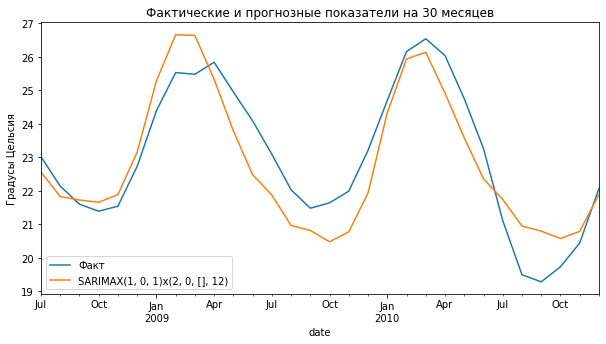

In [ ]:
test.rename(columns={'temp': 'Факт'}) \
     .plot(legend=True, figsize=(10,5))
predictions_s.plot(legend=True)
plt.title("Фактические и прогнозные показатели на 30 месяцев")
plt.ylabel("Градусы Цельсия")

Оценка модели

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error

mse_s = mean_squared_error(test.temp, predictions_s)
rmse_s = rmse(test.temp, predictions_s)
mape_s = mean_absolute_percentage_error(test.temp, predictions_s)
mae_s = mean_absolute_error(test.temp, predictions_s)

er = pd.DataFrame(data={'model': ['sarima'],
                        'mape': [mape_s],
                        'mae': [mae_s], 
                        'rmse': [rmse_s],
                        'mse': [mse_s]})
er

,model,mape,mae,rmse,mse
0,sarima,0.035386,0.805502,0.918397,0.843453


Модель в среднем ошибается на 3,5%, т.е. на 0,8 градуса Цельсия.
При этом среднеквдратическая ошибка RMSE больше и составляет 0,9 градуса, т.к. эта оценка более чувствительна к значительным отклонениям от среднего (которые имеют место в августе-октябре 2010 года).

### Прогнозирование с применением библиотеки prophet

Методология, лежащая в основе пакета Prophet, предполагает, что моделируемый временной ряд можно разложить на следующие компоненты:  
 - функция, аппроксимирующая тренд ряда, 
 - функция, аппроксимирующая сезонные колебания (например, годовые, недельные и т.п.), 
 - функция, отражающая эффекты праздников и других важных событий, 
 - нормально распределенные случайные возмущения.

In [ ]:
!pip install prophet -q

Преобразуем датасет, выводя индексы в отдельный столбец дат, и переименуем колонки

In [ ]:
from prophet import Prophet

#размер тестового датасета - 30
preds = 30

data_pr = data.reset_index() \
              .rename(columns={'date': 'ds', 'temp': 'y'})
              
# аналогичный тренировочный датасет
train_pr = data_pr[:-preds]

Обучение модели с учетом внутригодовой сезонности, режим - аддитивный, т.к. амплитуда сезонных колебаний относительно равномерна

In [ ]:
prophet = Prophet(seasonality_mode='additive',
                  yearly_seasonality = True,
                  weekly_seasonality = False,
                  daily_seasonality = False,
                  )
prophet.fit(train_pr)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpecf9qa0q/o3srfase.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecf9qa0q/l9qgbd4o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5425', 'data', 'file=/tmp/tmpecf9qa0q/o3srfase.json', 'init=/tmp/tmpecf9qa0q/l9qgbd4o.json', 'output', 'file=/tmp/tmpecf9qa0q/prophet_modeley3roeiz/prophet_model-20230209103613.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:36:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Формируем 30-месячный временной ряд и строим прогноз

In [ ]:
future_df = prophet.make_future_dataframe(periods=30, freq='MS')
future_df.tail()

,ds
727,2010-08-01
728,2010-09-01
729,2010-10-01
730,2010-11-01
731,2010-12-01


In [ ]:
forecast = prophet.predict(future_df)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1950-01-01,22.618046,22.597059,25.365375,22.618046,22.618046,1.340800,1.340800,1.340800,1.340800,1.340800,1.340800,0.0,0.0,0.0,23.958847
1,1950-02-01,22.618995,24.155290,26.738836,22.618995,22.618995,2.817018,2.817018,2.817018,2.817018,2.817018,2.817018,0.0,0.0,0.0,25.436014
2,1950-03-01,22.619853,24.522004,27.136191,22.619853,22.619853,3.242161,3.242161,3.242161,3.242161,3.242161,3.242161,0.0,0.0,0.0,25.862013
3,1950-04-01,22.620802,23.624143,26.284248,22.620802,22.620802,2.321611,2.321611,2.321611,2.321611,2.321611,2.321611,0.0,0.0,0.0,24.942412
4,1950-05-01,22.621720,22.422410,25.145378,22.621720,22.621720,1.102681,1.102681,1.102681,1.102681,1.102681,1.102681,0.0,0.0,0.0,23.724401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,2010-08-01,23.043787,19.489379,22.118050,23.039055,23.047774,-2.203059,-2.203059,-2.203059,-2.203059,-2.203059,-2.203059,0.0,0.0,0.0,20.840728
728,2010-09-01,23.041432,19.200652,21.902803,23.036257,23.045691,-2.481072,-2.481072,-2.481072,-2.481072,-2.481072,-2.481072,0.0,0.0,0.0,20.560360
729,2010-10-01,23.039152,19.534556,22.221566,23.033520,23.043961,-2.176842,-2.176842,-2.176842,-2.176842,-2.176842,-2.176842,0.0,0.0,0.0,20.862311
730,2010-11-01,23.036797,20.052978,22.930523,23.030821,23.041965,-1.517390,-1.517390,-1.517390,-1.517390,-1.517390,-1.517390,0.0,0.0,0.0,21.519407


Визуализация построенной модели

In [ ]:
df_pred = forecast[['ds', 'trend', 'yhat']].copy()
df_pred['ds'] = df_pred['ds'].astype('object')
df_pred['ds'] = pd.to_datetime(df_pred['ds']).dt.date

future_df['ds'] = future_df['ds'].astype('object')
future_df['ds'] = pd.to_datetime(future_df['ds']).dt.date

data_pr['ds'] = data_pr['ds'].astype('object')
data_pr['ds'] = pd.to_datetime(data_pr['ds']).dt.date

df_pred = df_pred.merge(future_df, on ='ds').merge(data_pr, on='ds', how='left')
df_pred.tail()

,ds,trend,yhat,y
727,2010-08-01,23.043787,20.840728,19.49
728,2010-09-01,23.041432,20.560360,19.28
729,2010-10-01,23.039152,20.862311,19.73
730,2010-11-01,23.036797,21.519407,20.44
731,2010-12-01,23.034517,22.667522,22.07


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_pred['ds'], y=df_pred['y'],
                    mode='lines+markers',
                    name='y'))
fig.add_trace(go.Scatter(x=df_pred['ds'], y=df_pred['yhat'],
                    mode='lines',
                    name='yhat'))
fig.add_trace(go.Scatter(x=df_pred['ds'], y=df_pred['trend'],
                    mode='lines',
                    name='trend'))
fig.update_layout(title_text='Прогнозные, фактические данные температуры поверхностного слоя воды и линия тренда')
fig.update_yaxes(title_text="Градусы Цельсия")

fig.show()

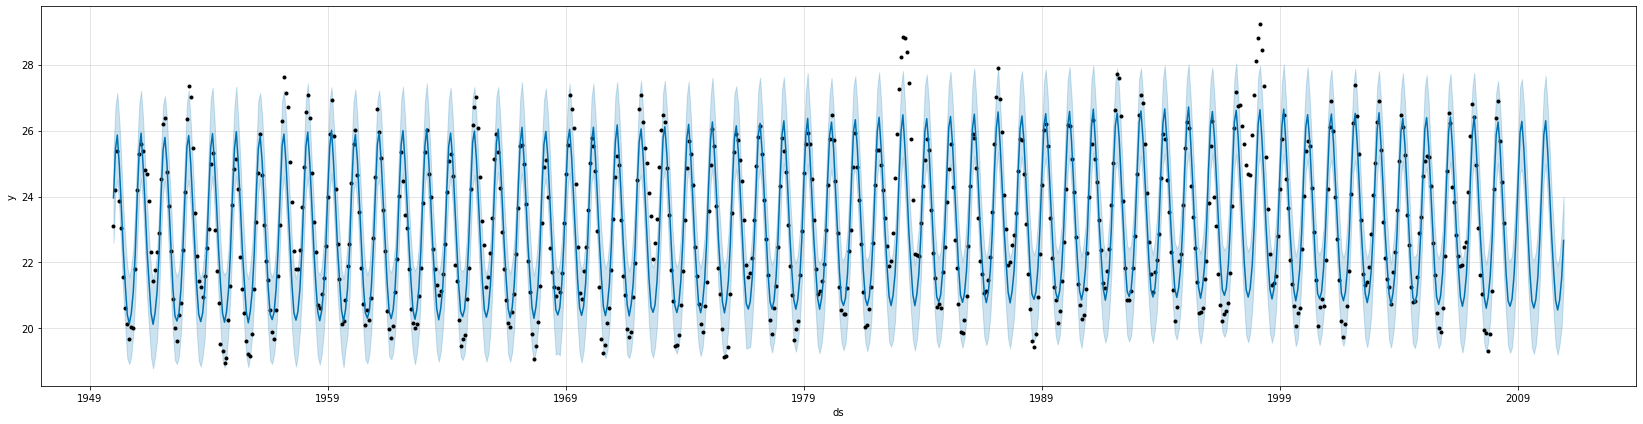

In [ ]:
fig = prophet.plot(forecast)
fig.set_figwidth(24)

На последнем графике видно, что, как правило, экстремальные случаи повышения или понижения температуры находятся в пределах доверительных интервалов, предусмотренных моделью. Исключение - особо силные явления Эль-Ниньо.

Строим график для сравнения фактических и прогнозных значений

In [ ]:
full_pr_data = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(data_pr.set_index('ds'))
full_pr_data.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
1950-01-01,23.958847,22.597059,25.365375,23.11
1950-02-01,25.436014,24.155290,26.738836,24.20
1950-03-01,25.862013,24.522004,27.136191,25.37
1950-04-01,24.942412,23.624143,26.284248,23.86
1950-05-01,23.724401,22.422410,25.145378,23.03


Text(0, 0.5, 'Градусы Цельсия')

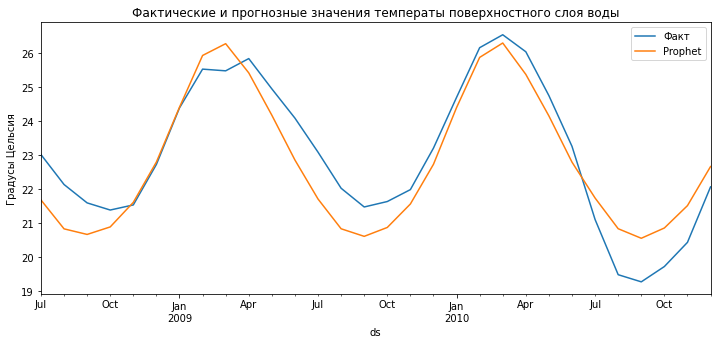

In [ ]:
plt.figure(figsize=(12,5))
full_pr_data.rename(columns={'y': 'Факт'})['Факт'] \
            .tail(30).plot(legend=True)
full_pr_data.rename(columns={'yhat': 'Prophet'})['Prophet'] \
            .tail(30).plot(legend=True)
plt.title("Фактические и прогнозные значения температы поверхностного слоя воды")
plt.ylabel("Градусы Цельсия")

Оценка модели

In [ ]:
mse_pr = mean_squared_error(full_pr_data.y, full_pr_data.yhat)
rmse_pr = rmse(full_pr_data.y, full_pr_data.yhat)
mape_pr = mean_absolute_percentage_error(full_pr_data.y, full_pr_data.yhat)
mae_pr = mean_absolute_error(full_pr_data.y, full_pr_data.yhat)

er_pr = pd.DataFrame({'model': ['prophet'],
                        'mape': [mape_pr],
                        'mae': [mae_pr], 
                        'rmse': [rmse_pr],
                        'mse': [mse_pr]})
er_pr

,model,mape,mae,rmse,mse
0,prophet,0.034495,0.797887,1.043888,1.089702


Модель в среднем ошибается на 3,4%, т.е. на 0,8 градуса Цельсия. При этом среднеквдратическая ошибка RMSE больше и составляет 1,04 градуса.

### Сравнение моделей

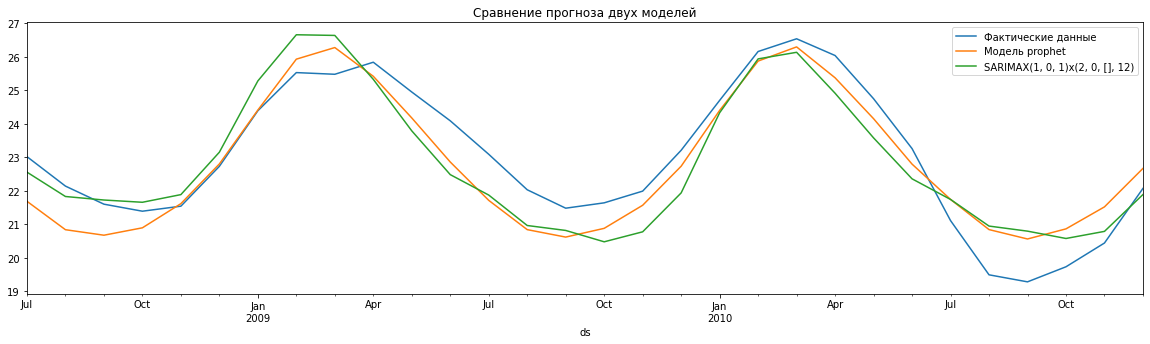

In [ ]:
plt.figure(figsize=(20,5))
full_pr_data.rename(columns={'y': 'Фактические данные'})['Фактические данные'] \
                                                         .tail(30).plot(legend=True)
full_pr_data.rename(columns={'yhat': 'Модель prophet'})['Модель prophet'] \
                                                         .tail(30).plot(legend=True)
predictions_s.plot(legend=True, title='Сравнение прогноза двух моделей')

In [ ]:
er = er.append(er_pr)
er

,model,mape,mae,rmse,mse
0,sarima,0.035386,0.805502,0.918397,0.843453
0,prophet,0.034495,0.797887,1.043888,1.089702


По показателю средней абсолютной ошибки MAE модели практически не отличаются - это следствие статиточности тренда временного ряда и устойчивости внутригодовых колебаний.   
При этом показатель среднеквадратической ошибки MSE, который более чувствителей к экстремальным колебаниям, несколько меньше у модели, построенной при применении метода SARIMA. Но эта разница незначительна и объясняется, скорее, не качеством модели, а свойствами скользящего среднего, тем более, что полученная модель имеет значение лага 1: особенность признака в том, что повышение температуры происходит не за месяц, а в течение нескольких месяцев, поэтому значение температуры в одном месяце адекватно корректирует прогноз на следующий месяц.   
Учитывая выявленный тренд на плавное снижение средний показателей после 1998 года и сглаживание влияния прочих факторов, кроме внутригодовой сезонности, прогноз на осноме модели SARIMA будет малоэффективен для долгосрочного прогнозирования аномальных колебаний, приводящих к явлению Эль-Ниньо.  
То же самое можно сказать и о модели на основе prophet, но в условиях сопоставимости ошибок выберем эту модель, так как модель SARIMA более склонна к сглаживанию случайных возмущений, а в нашем случае эти колебания признака не являются случайностью, а наоборот, представляют непосредственный интерес.

## Построение прогноза на основе выбранной модели

In [ ]:
prophet = Prophet(seasonality_mode='additive',
                  yearly_seasonality = True,
                  weekly_seasonality = False,
                  daily_seasonality = False,
                  )
prophet.fit(data_pr)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpecf9qa0q/97rp662k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpecf9qa0q/9o1p1k1n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81141', 'data', 'file=/tmp/tmpecf9qa0q/97rp662k.json', 'init=/tmp/tmpecf9qa0q/9o1p1k1n.json', 'output', 'file=/tmp/tmpecf9qa0q/prophet_modelum757__d/prophet_model-20230209103616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:36:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future_df = prophet.make_future_dataframe(periods=12, freq='MS')
forecast = prophet.predict(future_df)

In [ ]:
full_pr_data = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(data_pr.set_index('ds'))
full_pr_data.tail()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2011-08-01,20.874995,19.537985,22.234747,NaN
2011-09-01,20.542983,19.187204,21.851313,NaN
2011-10-01,20.887135,19.476120,22.175270,NaN
2011-11-01,21.502588,20.169860,22.844580,NaN
2011-12-01,22.629634,21.365582,23.870555,NaN


Text(0, 0.5, 'Градусы Цельсия')

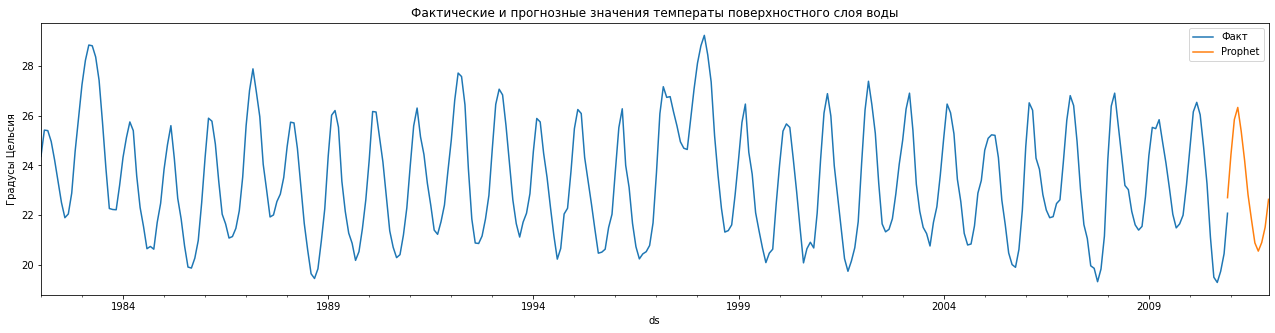

In [ ]:
plt.figure(figsize=(22,5))
full_pr_data.rename(columns={'y': 'Факт'})['Факт'] \
            .tail(360) \
            .plot(legend=True)
full_pr_data.rename(columns={'yhat': 'Prophet'})['Prophet'] \
            .tail(13).plot(legend=True)
plt.title("Фактические и прогнозные значения температы поверхностного слоя воды")
plt.ylabel("Градусы Цельсия")

## Выводы

Можно сделать вывод о том, что поставленные задачи выполнены: из построенных моделей выбрана одна предпочтительная, построен прогноз на год вперед.  
Модель хорошо отражает явную внутригодовую сезонность и основной неяркий тренд.  
При этом для сколько-нибудь точного предсказания аномального повышения температуры поверхностного слоя воды недостаточно только фактических данных за определенный период. Так как именно аномалии представляют наибольший интерес, модель должна учитывать влияние многих факторов. Этого, предположительно, можно достичь двумя путями: 

*   либо обучать модель на временном ряде гораздо большего размера (тогда в анализе были бы учтены другие случаи ярко выраженных явлений Эль-Ниньо, а не только 80-х и 90-х годов 20 века),
*   либо строить модель, учитывающую влияние определенных факторов, коррелирующих именно с аномальным повышением температуры (солнечная активность, океанические течения, атмосферное давление, аномалии в других зонах Земли и др.).

